# Sumário

- [Apresentação dos Dados](#Apresentação-dos-Dados)
    - [Dados Pontuais](#Dados-Pontuais)
    - [Texto dos Eixos e do Título](#Texto-dos-Eixos-e-do-Título)

- [Regressão Linear](#Regressão-Linear)
    - [Separação dos Dados](#Separação-dos-Dados)
    - [Aplicação da Regressão](#Aplicação-da-Regressão)
    - [Desenho da Regressão](#Desenho-da-Regressão)
    - [Resultado da Regressão](#Resultado-da-Regressão)

- [Barras de Incerteza](#Barras-de-Incerteza)
    - [Dados Pontuais com Barras de Incerteza](#Dados-Pontuais-com-Barras-de-Incerteza)
    - [Regressão Linear com Incertezas](#Regressão-Linear-com-Incertezas)
    - [Resultado com Incertezas](#Resultado-com-Incertezas)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
config_nb = {
    'axes.spines.right': False,
    'axes.spines.top':   False,
    'axes.edgecolor':  '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (8.1, 6.3),
    'font.size': 16.0,
    'grid.linestyle': '--',
    'legend.facecolor': '1.0',
    'legend.framealpha': 0.9,
    'legend.frameon': True,
    'savefig.transparent': False,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}
plt.style.use(['seaborn-darkgrid', 'seaborn-notebook', 'seaborn-bright', config_nb])

# Apresentação dos Dados

Os dados aqui são da relação de corrente e tensão em um resistor, dado pela equação teórica abaixo, que podem ser encontrados na página 'Resistor' da planilha 'Dados.xlsx' da [*Introdução*](1%20-%20Introdução.ipynb#Importando-os-Dados "Introdução - Importando os Dados").

$$ I = \frac{1}{R} V $$


In [3]:
dados = pd.read_excel('Dados.xlsx', sheet_name='Resistor')

dados

,V,dV,I,dI
0,-3.065655,0.294275,-34.377359,3.155834
1,-2.697820,0.267610,-27.956811,3.067110
2,-1.692812,0.184774,-15.833063,1.646959
3,-1.471680,0.161785,-10.788397,0.936612
4,-0.615852,0.060667,-7.936452,0.716368
5,-0.043765,0.015124,-0.050024,0.114909
6,0.717312,0.084274,7.430798,0.721983
7,1.254987,0.129546,13.371898,1.357838
8,2.353406,0.196184,21.558016,2.157432
9,2.480765,0.267800,31.335690,2.895233


## Dados Pontuais

Para representar dados pontuais com <TT>pyplot</TT>, a função é [`scatter`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html "matplotlib.pyplot.scatter"). O acesso no `DataFrame` é por nome da coluna, como se fosse um `dict` de <TT>Python</TT>.

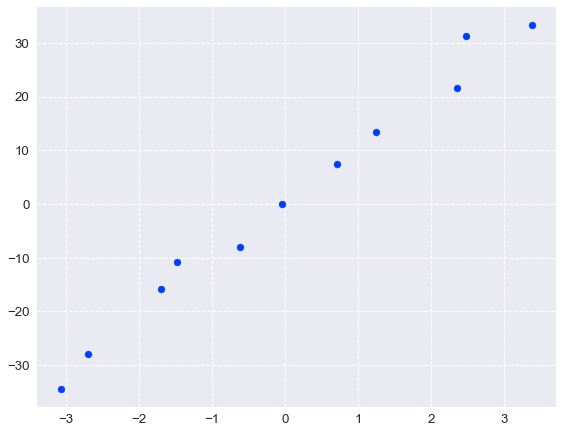

In [4]:
plt.scatter(dados['V'], dados['I'])

## Texto dos Eixos e do Título

Text(0.5, 1.0, 'Relação da Corrente pela\nTensão em um Resistor')

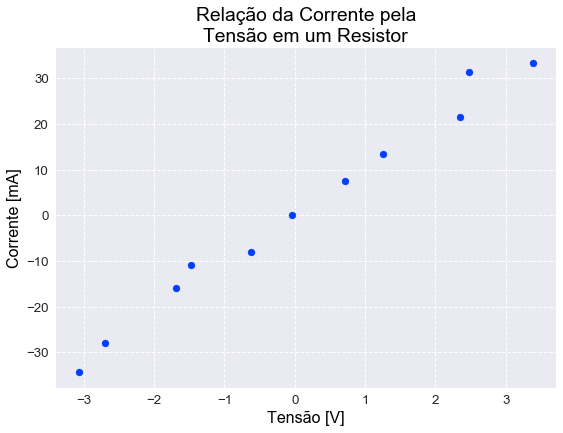

In [5]:
plt.scatter(dados['V'], dados['I'])

plt.xlabel('Tensão [V]')
plt.ylabel('Corrente [mA]')
plt.title('''Relação da Corrente pela
Tensão em um Resistor''')

# Regressão Linear

## Separação dos Dados

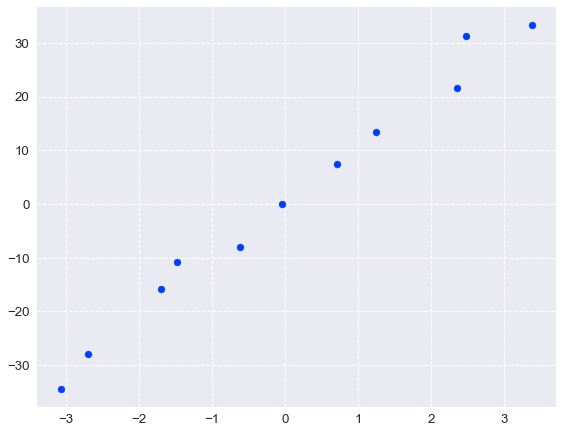

In [6]:
V, I = dados['V'], dados['I']

plt.scatter(V, I, zorder=10, label='Dados Coletados')

## Aplicação da Regressão

Uma das formas mais abrangentes de se fazer a regressão é com o pacote [`odr`](https://docs.scipy.org/doc/scipy/reference/odr.html "scipy.odr") do <TT>SciPy</TT>, feita por distância ortogonal dos dados, mas pode ser utilizada com mínimos quadrados.

In [7]:
from scipy import odr

Agora, para a regressão, é preciso montar organizar os dados em uma instância de [`RealData`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.RealData.html "scipy.odr.RealData") e usar isso para criar uma instância da [`ODR`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.html "scipy.odr.ODR") com o modelo da regressão, que em todos os exemplos desse material será o [`odr.models.unilinear`](https://docs.scipy.org/doc/scipy/reference/odr.html#scipy.odr.unilinear "scipy.odr.models.unilinear").

Para usar o método dos mínimos quadrados é só chamar o método [`set_job`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.set_job.html "scipy.odr.ODR.set_job") com argumento `fit_type=2`. Depois é só rodar a regressão com o [`run`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.run.html "scipy.odr.ODR.run"), que retorna um objeto [`Output`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.Output.html "scipy.odr.Output") com várias informações, entre elas os coeficientes e suas incertezas, nos atributos `beta` e `sd_beta`.

In [8]:
# regressão linear
data = odr.RealData(V, I)
odreg = odr.ODR(data, odr.models.unilinear)
odreg.set_job(fit_type=2)  # muda para mínimos quadrados
ans = odreg.run()

a, b = ans.beta      # y = ax + b
da, db = ans.sd_beta # incertezas de a e b

# mostrando os coeficientes e suas incertezas
print(f'coef. angular = ({a}+-{da}) [mA/V -> kOhm^-1 -> kS]')
print(f'coef. linear  = ({b}+-{db}) [mA]')

coef. angular = (10.389236050041834+-0.4158465159985413) [mA/V -> kOhm^-1 -> kS]
coef. linear  = (0.34999478441064824+-0.8623053486601878) [mA]


## Desenho da Regressão

Desenhar a reta da regressão é com a função [`plot`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html "matplotlib.pyplot.plot"), mas antes precisamos montar o rótulo que irá na legenda do gráfico. No código abaixo têm dois exemplos para o rótulo, um apenas textual e outro com os coeficientes da regressão.

Qualquer tipo de curva no <TT>Matplotlib</TT> é feito com pontos que são ligados entre si, ou seja, são apenas segmentos de reta conectados. Para simular a continuidade em outras curvas, costuma-se fazer vários pontos na região em que se deseja desenhar. Podemos fazer isso com a função [`linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html "numpy.linspace") do <TT>NumPy</TT>, em que o primeiro argumento é o começo dos pontos, o segundo é o final do intervalo e o argumento `num` é a quantidade de pontos igualmente espaçados nessa região.

Por mais que isso não seja muito importante nesse caso, no código tem um exemplo de como fazer esse intervalo com 200 pontos igualmente espaçados, armazenado em `X`. Com esses pontos, é possível aplicar a função da curva nesse intervalo para encontrar a imagem desse intervalo, mas devido às técnicas de [vetorização](https://realpython.com/numpy-array-programming/\#what-is-vectorization "What is Vectorization?") do `NumPy`, isso é feito como se fosse aplicar a operação em apenas um valor, mas a biblioteca realiza o laço implicitamente e retorna outro vetor em `Y`.

Além disso, para diferenciar a regressão dos valores, ela foi desenhada em vermelho, com `color='red'`, e com 60% de transparência, com `alpha=0.6`. Depois do gráfico já desenhado, foi usado ainda a função [`legend`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html "matplotlib.pyplot.legend") para desenhar a legenda. Depois disso, é só colocar os nomes nomes do eixos e o título, como na seção [*Texto dos Eixos e do Título*](#Texto-dos-Eixos-e-do-Título "Apresentação dos Dados - Texto dos Eixos e do Título").

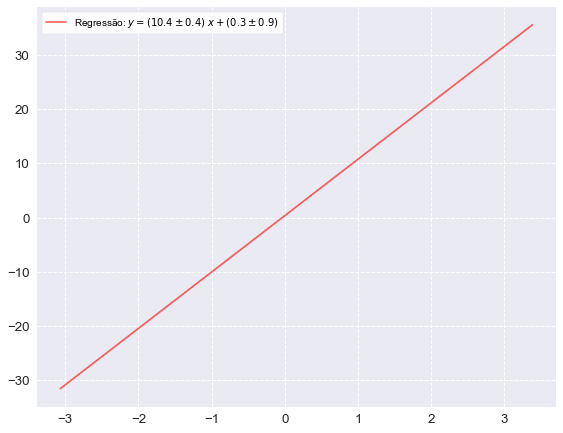

In [9]:
rotulo = 'Regressão Linear'
# ou
rotulo = f'Regressão: $y = ({a:.1f} \pm {da:.1f})~x + ({b:.1f} \pm {db:.1f})$'

# monta os limites para desenho da reta
X = np.linspace(min(V), max(V), num=200)
Y =  a * X + b
# e faz o gráfico dela atrá dos pontos
plt.plot(X, Y, color='red', alpha=0.6, label=rotulo)

# para exibir as legendas do gráfico
plt.legend()

## Resultado da Regressão

Text(0.5, 1.0, 'Regressão Linear da Corrente\npela Tensão em um Resistor')

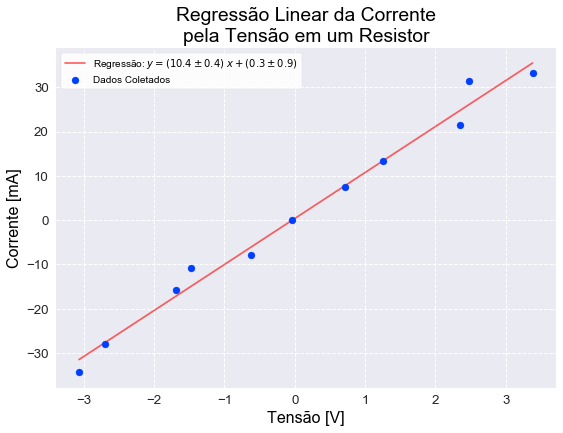

In [10]:
# desenho dos pontos
plt.scatter(V, I, zorder=10, label='Dados Coletados')

# desenho da regressão
plt.plot(X, Y, color='red', alpha=0.6, label=rotulo)

# legenda e textos
plt.legend()
plt.xlabel('Tensão [V]')
plt.ylabel('Corrente [mA]')
plt.title('''Regressão Linear da Corrente
pela Tensão em um Resistor''')

# Barras de Incerteza

## Dados Pontuais com Barras de Incerteza

A função do <TT>pyplot</TT> para desenhar as barras de incerteza é [`errorbar`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.errorbar.html "matplotlib.pyplot.errorbar") com os argumentos `xerr=dx` e `yerr=dy`. O argumento `fmt` foi usado para fazer com que os dados fossem desenhados como pontos, que é o formato `'o'`. Além disso, os argumentos `elinewidth`, `capsize` e `capthick` controlam a grossura da barra de incerteza, o comprimento do topo da barra e a grossura desse topo, respectivamente. A cor dos pontos e das barras foi alterado para preto com `color='black'`. Novamente, esses desenhos foram colocados com ordem alta de desenho e com um rótulo para a legenda.

<ErrorbarContainer object of 3 artists>

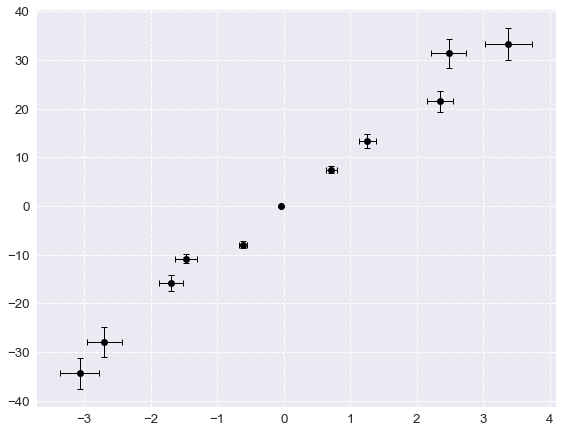

In [11]:
# separa as colunas
V, dV = dados['V'], dados['dV']
I, dI = dados['I'], dados['dI']

# desenha os dados com barras de incerteza
plt.errorbar(
    V, I, xerr=dV, yerr=dI,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

## Regressão Linear com Incertezas

A regressão com incertezas fica bem parecida com a da seção [*Aplicação da Regressão*](#Aplicação-da-Regressão "Regressão Linear - Aplicação da Regressão"), utilizando o pacote `odr`. A primeira diferença é que o `RealData` agora tem as incertezas de $x$ e $y$ em `sx` e `sy`. O problema com a regressão da seção anterior é que o método dos mínimos quadrados não é capaz de analisar as incertezas em $x$, então vamos deixar a `ODR` aplicar a regressão por distância ortogonal, como no código abaixo.

In [12]:
# regressão linear com incertezas
data = odr.RealData(V, I, sx=dV, sy=dI)
odreg = odr.ODR(data, odr.models.unilinear)
#odreg.set_job(fit_type=2)  # mínimos quadrados não suporta incertezas em x
ans = odreg.run()

a, b = ans.beta      # y = ax + b
da, db = ans.sd_beta # incertezas de a e b

# mostrando os coeficientes e suas incertezas
print(f'coef. angular = ({a}+-{da}) [mA/V -> kOhm^-1 -> kS]')
print(f'coef. linear  = ({b}+-{db}) [mA]')

coef. angular = (10.349661586274507+-0.5546403384712124) [mA/V -> kOhm^-1 -> kS]
coef. linear  = (0.3524272624345639+-0.21906887637354278) [mA]


> Note que os coeficientes $a$ e $b$ da regressão, tanto em seus valores quanto nas suas incertezas, são levemente diferentes dos da seção [*Aplicação da Regressão*](#Aplicação-da-Regressão "Regressão Linear - Aplicação da Regressão"), mesmo com os dados numéricos idênticos. A diferença aqui se deve, além do método de regressão diferente, mas também das incertezas dos dados, que agora estão sendo levadas em conta.

## Resultado com Incertezas

Text(0.5, 1.0, 'Regressão Linear da Corrente\npela Tensão em um Resistor')

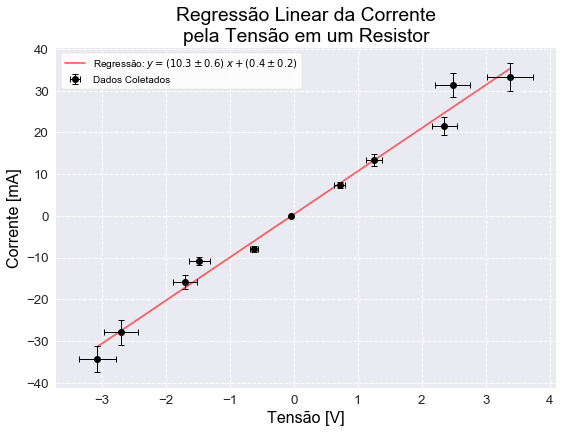

In [13]:
rotulo = f'Regressão: $y = ({a:.1f} \pm {da:.1f})~x + ({b:.1f} \pm {db:.1f})$'

# monta os limites para desenho da reta
X = np.linspace(min(V), max(V), num=200)
Y =  a * X + b

# barras de incerteza
plt.errorbar(
    V, I, xerr=dV, yerr=dI,
    fmt='o', elinewidth=1, capsize=3, capthick=1, color='black',
    zorder=10, label='Dados Coletados'
)

# desenho da regressão
plt.plot(X, Y, color='red', alpha=0.6, label=rotulo)

# legenda e os textos
plt.legend()
plt.xlabel('Tensão [V]')
plt.ylabel('Corrente [mA]')
plt.title('''Regressão Linear da Corrente
pela Tensão em um Resistor''')

---
Ignore o código abaixo, é pra carregar os estilos.

In [14]:
from IPython.core.display import HTML

with open('.estilo.css', 'r') as estilo_arq:
    estilo = estilo_arq.read()

HTML(estilo)